<a href="https://colab.research.google.com/github/LNshuti/umuturanyi/blob/main/mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis and Advanced Modeling with Feature Engineering**

---

### Table of Contents

1. [Data Loading](#data-loading)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
   - [Data Overview](#data-overview)
   - [Missing Values](#missing-values)
   - [Statistical Summary](#statistical-summary)
   - [Data Visualization](#data-visualization)
3. [Feature Engineering](#feature-engineering)
   - [Date Features](#date-features)
   - [Encoding Categorical Variables](#encoding-categorical-variables)
   - [Handling Missing Values](#handling-missing-values)
4. [Modeling](#modeling)
   - [Data Splitting](#data-splitting)
   - [Model Selection](#model-selection)
   - [Training XGBoost Model](#training-xgboost-model)
   - [Model Evaluation](#model-evaluation)
5. [Inference with Gradio](#inference-with-gradio)
6. [Conclusion](#conclusion)

---

## Data Loading

First, we'll load the dataset using Polars.


In [47]:
import pandas as pd
import numpy as np
import polars as pl

In [48]:
!ls

sample_data  tn_weekly_mobility_2019.parquet


In [49]:
df = pl.read_parquet('tn_weekly_mobility_2019.parquet')
df

date,daily_normalization_factor,weekly_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy
date,i32,i32,f64,str,str,i32,str,str,str,str,str,str,str,str,i32,i32,str,str,i64,str,str,str,i32,f64,str,str,str,str,str,str,str,i32,f64,f64
2018-12-31,16984419,16984419,null,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2018-12-31T00:00:00-05:00""","""2019-01-07T00:00:00-05:00""",4,4,"""[0,1,1,0,0,0,2]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""210659203001"""":4}""","""{""""US"""":4}""",null,14.5,"""{""""<5"""":0,""""5-20"""":3,""""21-60""""…","""{}""","""{}""","""{""""android"""":4,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2018.0,53.0
2019-01-07,17934334,17756801,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-07T00:00:00-05:00""","""2019-01-14T00:00:00-05:00""",4,2,"""[1,0,1,2,0,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730505032"""":4}""","""{}""",null,252.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""","""{""""android"""":4,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019.0,1.0
2019-01-14,18382238,18506902,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-14T00:00:00-05:00""","""2019-01-21T00:00:00-05:00""",4,3,"""[1,1,0,0,1,1,0]""","""[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{""""470370156272"""":4}""","""{}""","""{""""US"""":4}""",null,247.5,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{}""","""{""""android"""":5,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019.0,2.0
2019-01-21,18270223,18419526,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-21T00:00:00-05:00""","""2019-01-28T00:00:00-05:00""",7,4,"""[0,3,2,1,1,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,63.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""","""{""""android"""":0,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019.0,3.0
2019-01-28,18414495,18203512,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-28T00:00:00-05:00""","""2019-02-04T00:00:00-05:00""",8,5,"""[3,1,1,2,1,0,0]""","""[0,0,0,1,0,0,0,0,0,0,1,0,0,0,1…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,176.0,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{""""Pepper Palace"""":20,""""The Ch…","""{""""android"""":0,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019.0,4.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019-12-02,17840843,16358309,1.8506902e7,"""sg:fff6f11b48304ec38d07c9a86af…","""TN""",37075,"""Walgreens""","""365 New Shackle Island 

In [50]:
df.columns

['date',
 'daily_normalization_factor',
 'weekly_normalization_factor',
 'yearly_normalization_factor',
 'safegraph_place_id',
 'region',
 'postal_code',
 'location_name',
 'street_address',
 'city',
 'iso_country_code',
 'safegraph_brand_ids',
 'brands',
 'date_range_start',
 'date_range_end',
 'raw_visit_counts',
 'raw_visitor_counts',
 'visits_by_day',
 'visits_by_each_hour',
 'poi_cbg',
 'visitor_home_cbgs',
 'visitor_daytime_cbgs',
 'visitor_country_of_origin',
 'distance_from_home',
 'median_dwell',
 'bucketed_dwell_times',
 'related_same_day_brand',
 'related_same_week_brand',
 'device_type',
 'week',
 'top_category',
 'sub_category',
 'naics_code',
 'year',
 'woy']

In [51]:
class_survival_counts = (
    df
    .group_by('top_category','sub_category')
    .len()
    .sort("len", descending=True)
    .head(10)
)
print(class_survival_counts)

shape: (10, 3)
┌─────────────────────────────────┬─────────────────────────────────┬───────┐
│ top_category                    ┆ sub_category                    ┆ len   │
│ ---                             ┆ ---                             ┆ ---   │
│ str                             ┆ str                             ┆ u32   │
╞═════════════════════════════════╪═════════════════════════════════╪═══════╡
│ Restaurants and Other Eating P… ┆ Full-Service Restaurants        ┆ 83212 │
│ Religious Organizations         ┆ Religious Organizations         ┆ 65726 │
│ Offices of Physicians           ┆ Offices of Physicians (except … ┆ 38668 │
│ Restaurants and Other Eating P… ┆ Limited-Service Restaurants     ┆ 36852 │
│ Gasoline Stations               ┆ Gasoline Stations with Conveni… ┆ 36655 │
│ Child Day Care Services         ┆ Child Day Care Services         ┆ 29103 │
│ Elementary and Secondary Schoo… ┆ Elementary and Secondary Schoo… ┆ 24029 │
│ Offices of Dentists             ┆ Offices of De

In [52]:
top_category_counts = (
    df
    .group_by('top_category')
    .len()
    .sort("len", descending=True)
    .head(10)
)
print(top_category_counts)

shape: (10, 2)
┌─────────────────────────────────┬────────┐
│ top_category                    ┆ len    │
│ ---                             ┆ ---    │
│ str                             ┆ u32    │
╞═════════════════════════════════╪════════╡
│ Restaurants and Other Eating P… ┆ 138240 │
│ Religious Organizations         ┆ 65726  │
│ Offices of Physicians           ┆ 38668  │
│ Gasoline Stations               ┆ 36966  │
│ Child Day Care Services         ┆ 29103  │
│ Automotive Repair and Maintena… ┆ 27426  │
│ Grocery Stores                  ┆ 27395  │
│ Health and Personal Care Store… ┆ 26504  │
│ Other Amusement and Recreation… ┆ 24403  │
│ Elementary and Secondary Schoo… ┆ 24029  │
└─────────────────────────────────┴────────┘


In [53]:
missing_values = df.null_count()
# Display missing value counts
print(missing_values)

shape: (1, 35)
┌──────┬───────────────┬───────────────┬──────────────┬───┬──────────────┬────────────┬──────┬─────┐
│ date ┆ daily_normali ┆ weekly_normal ┆ yearly_norma ┆ … ┆ sub_category ┆ naics_code ┆ year ┆ woy │
│ ---  ┆ zation_factor ┆ ization_facto ┆ lization_fac ┆   ┆ ---          ┆ ---        ┆ ---  ┆ --- │
│ u32  ┆ ---           ┆ r             ┆ tor          ┆   ┆ u32          ┆ u32        ┆ u32  ┆ u32 │
│      ┆ u32           ┆ ---           ┆ ---          ┆   ┆              ┆            ┆      ┆     │
│      ┆               ┆ u32           ┆ u32          ┆   ┆              ┆            ┆      ┆     │
╞══════╪═══════════════╪═══════════════╪══════════════╪═══╪══════════════╪════════════╪══════╪═════╡
│ 0    ┆ 0             ┆ 0             ┆ 16791        ┆ … ┆ 0            ┆ 0          ┆ 0    ┆ 0   │
└──────┴───────────────┴───────────────┴──────────────┴───┴──────────────┴────────────┴──────┴─────┘


In [54]:
# Describe numerical columns
numerical_cols = df.select(pl.col(pl.Float64, pl.Int64)).columns
print(df.select(numerical_cols).describe())

shape: (9, 6)
┌────────────┬─────────────────────────────┬───────────┬──────────────┬─────────────┬───────────┐
│ statistic  ┆ yearly_normalization_factor ┆ poi_cbg   ┆ median_dwell ┆ year        ┆ woy       │
│ ---        ┆ ---                         ┆ ---       ┆ ---          ┆ ---         ┆ ---       │
│ str        ┆ f64                         ┆ f64       ┆ f64          ┆ f64         ┆ f64       │
╞════════════╪═════════════════════════════╪═══════════╪══════════════╪═════════════╪═══════════╡
│ count      ┆ 877224.0                    ┆ 894015.0  ┆ 894015.0     ┆ 894015.0    ┆ 894015.0  │
│ null_count ┆ 16791.0                     ┆ 0.0       ┆ 0.0          ┆ 0.0         ┆ 0.0       │
│ mean       ┆ 1.8506902e7                 ┆ 4.7081e11 ┆ 67.698725    ┆ 2018.981218 ┆ 27.362168 │
│ std        ┆ 0.0                         ┆ 9.1089e9  ┆ 111.998173   ┆ 0.135753    ┆ 15.15391  │
│ min        ┆ 1.8506902e7                 ┆ 1.0830e10 ┆ 4.0          ┆ 2018.0      ┆ 1.0       │
│ 25% 

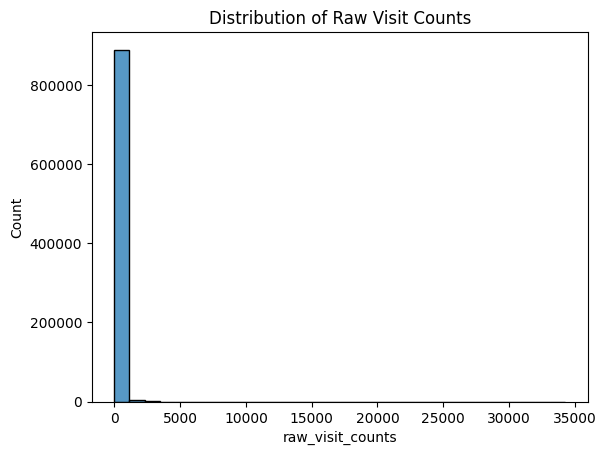

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for Seaborn compatibility
df_pd = df.to_pandas()

# Histogram of 'raw_visit_counts'
sns.histplot(data=df_pd, x='raw_visit_counts', bins=30)
plt.title('Distribution of Raw Visit Counts')
plt.show()

In [56]:
df = df.with_columns([
    pl.col('date').dt.year().alias('year'),
    pl.col('date').dt.month().alias('month'),
    pl.col('date').dt.day().alias('day')
])
df

date,daily_normalization_factor,weekly_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy,month,day
date,i32,i32,f64,str,str,i32,str,str,str,str,str,str,str,str,i32,i32,str,str,i64,str,str,str,i32,f64,str,str,str,str,str,str,str,i32,i32,f64,i8,i8
2018-12-31,16984419,16984419,null,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2018-12-31T00:00:00-05:00""","""2019-01-07T00:00:00-05:00""",4,4,"""[0,1,1,0,0,0,2]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""210659203001"""":4}""","""{""""US"""":4}""",null,14.5,"""{""""<5"""":0,""""5-20"""":3,""""21-60""""…","""{}""","""{}""","""{""""android"""":4,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2018,53.0,12,31
2019-01-07,17934334,17756801,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-07T00:00:00-05:00""","""2019-01-14T00:00:00-05:00""",4,2,"""[1,0,1,2,0,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730505032"""":4}""","""{}""",null,252.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""","""{""""android"""":4,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019,1.0,1,7
2019-01-14,18382238,18506902,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-14T00:00:00-05:00""","""2019-01-21T00:00:00-05:00""",4,3,"""[1,1,0,0,1,1,0]""","""[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{""""470370156272"""":4}""","""{}""","""{""""US"""":4}""",null,247.5,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{}""","""{""""android"""":5,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019,2.0,1,14
2019-01-21,18270223,18419526,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-21T00:00:00-05:00""","""2019-01-28T00:00:00-05:00""",7,4,"""[0,3,2,1,1,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,63.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""","""{""""android"""":0,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019,3.0,1,21
2019-01-28,18414495,18203512,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…","""TN""",37857,"""Hawkins Medical Center""","""4966 Highway 11W""","""Rogersville""","""US""","""""","""""","""2019-01-28T00:00:00-05:00""","""2019-02-04T00:00:00-05:00""",8,5,"""[3,1,1,2,1,0,0]""","""[0,0,0,1,0,0,0,0,0,0,1,0,0,0,1…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,176.0,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{""""Pepper Palace"""":20,""""The Ch…","""{""""android"""":0,""""ios"""":0}""","""mobility-weekly-files/weekly-p…","""Offices of Physicians""","""Offices of Physicians (except …",621111,2019,4.0,1,28
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019-12-02,17840843,16358309,1.8506902e7,"""sg:fff6f11b48304ec38d07c9a86af…","""TN""",37075,"""Walg

In [57]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['region', 'city', 'device_type', 'top_category', 'sub_category']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
for col in categorical_cols:
    df = df.with_columns([
        pl.Series(col, le.fit_transform(df[col].to_pandas()))
    ])

In [58]:
df

date,daily_normalization_factor,weekly_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy,month,day
date,i32,i32,f64,str,i64,i32,str,str,i64,str,str,str,str,str,i32,i32,str,str,i64,str,str,str,i32,f64,str,str,str,i64,str,i64,i64,i32,i32,f64,i8,i8
2018-12-31,16984419,16984419,null,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2018-12-31T00:00:00-05:00""","""2019-01-07T00:00:00-05:00""",4,4,"""[0,1,1,0,0,0,2]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""210659203001"""":4}""","""{""""US"""":4}""",null,14.5,"""{""""<5"""":0,""""5-20"""":3,""""21-60""""…","""{}""","""{}""",24919,"""mobility-weekly-files/weekly-p…",83,163,621111,2018,53.0,12,31
2019-01-07,17934334,17756801,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-07T00:00:00-05:00""","""2019-01-14T00:00:00-05:00""",4,2,"""[1,0,1,2,0,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730505032"""":4}""","""{}""",null,252.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""",24919,"""mobility-weekly-files/weekly-p…",83,163,621111,2019,1.0,1,7
2019-01-14,18382238,18506902,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-14T00:00:00-05:00""","""2019-01-21T00:00:00-05:00""",4,3,"""[1,1,0,0,1,1,0]""","""[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{""""470370156272"""":4}""","""{}""","""{""""US"""":4}""",null,247.5,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{}""",28135,"""mobility-weekly-files/weekly-p…",83,163,621111,2019,2.0,1,14
2019-01-21,18270223,18419526,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-21T00:00:00-05:00""","""2019-01-28T00:00:00-05:00""",7,4,"""[0,3,2,1,1,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,63.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""",0,"""mobility-weekly-files/weekly-p…",83,163,621111,2019,3.0,1,21
2019-01-28,18414495,18203512,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-28T00:00:00-05:00""","""2019-02-04T00:00:00-05:00""",8,5,"""[3,1,1,2,1,0,0]""","""[0,0,0,1,0,0,0,0,0,0,1,0,0,0,1…",470730503021,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,176.0,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{""""Pepper Palace"""":20,""""The Ch…",0,"""mobility-weekly-files/weekly-p…",83,163,621111,2019,4.0,1,28
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019-12-02,17840843,16358309,1.8506902e7,"""sg:fff6f11b48304ec38d07c9a86af…",0,37075,"""Walgreens""","""365 New Shackle Island Rd""",205,"""US""","""SG_BRAND_63ea689e38887d2a25b1f…","""Walgreens""","""2019-12-02T00:00:00-06:00""","""2019-12-09T00:00:00-06:00""",119,105,"""[17,13,23,13,26,14,13]""","""[0,0,0,0,0,0,0,0,0,0,3,1,1,1,2…",471650211052,"""{""""471650210091"""":11,""""4716502…","""{""""471650211052"""":8,""""47165021…","""{""""US"""":102,""""ID"""":4}""",4307,9.0,"""{""""<5"""":12,""""5-20"""":88,""""21-60…","""{""""Kohl's"""":20,""""McDonald's"""":…","""{""""Kroger"""":31,""""Dollar Genera…",28374,"""mobility-weekly-files/weekly-p…",56,193,446110,20

In [59]:
for col in numerical_cols:
    median_value = df.select(pl.col(col)).median()
    df = df.with_columns([
        pl.col(col).fill_null(median_value)
    ])

In [60]:
df

date,daily_normalization_factor,weekly_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy,month,day
date,i32,i32,f64,str,i64,i32,str,str,i64,str,str,str,str,str,i32,i32,str,str,f64,str,str,str,i32,f64,str,str,str,i64,str,i64,i64,i32,f64,f64,i8,i8
2018-12-31,16984419,16984419,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2018-12-31T00:00:00-05:00""","""2019-01-07T00:00:00-05:00""",4,4,"""[0,1,1,0,0,0,2]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",4.7073e11,"""{}""","""{""""210659203001"""":4}""","""{""""US"""":4}""",null,14.5,"""{""""<5"""":0,""""5-20"""":3,""""21-60""""…","""{}""","""{}""",24919,"""mobility-weekly-files/weekly-p…",83,163,621111,2018.0,53.0,12,31
2019-01-07,17934334,17756801,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-07T00:00:00-05:00""","""2019-01-14T00:00:00-05:00""",4,2,"""[1,0,1,2,0,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",4.7073e11,"""{}""","""{""""470730505032"""":4}""","""{}""",null,252.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""",24919,"""mobility-weekly-files/weekly-p…",83,163,621111,2019.0,1.0,1,7
2019-01-14,18382238,18506902,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-14T00:00:00-05:00""","""2019-01-21T00:00:00-05:00""",4,3,"""[1,1,0,0,1,1,0]""","""[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0…",4.7073e11,"""{""""470370156272"""":4}""","""{}""","""{""""US"""":4}""",null,247.5,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{}""",28135,"""mobility-weekly-files/weekly-p…",83,163,621111,2019.0,2.0,1,14
2019-01-21,18270223,18419526,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-21T00:00:00-05:00""","""2019-01-28T00:00:00-05:00""",7,4,"""[0,3,2,1,1,0,0]""","""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0…",4.7073e11,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,63.0,"""{""""<5"""":0,""""5-20"""":1,""""21-60""""…","""{}""","""{}""",0,"""mobility-weekly-files/weekly-p…",83,163,621111,2019.0,3.0,1,21
2019-01-28,18414495,18203512,1.8506902e7,"""sg:00049a80166146d580aaacb6bae…",0,37857,"""Hawkins Medical Center""","""4966 Highway 11W""",399,"""US""","""""","""""","""2019-01-28T00:00:00-05:00""","""2019-02-04T00:00:00-05:00""",8,5,"""[3,1,1,2,1,0,0]""","""[0,0,0,1,0,0,0,0,0,0,1,0,0,0,1…",4.7073e11,"""{}""","""{""""470730503021"""":4}""","""{""""US"""":4}""",null,176.0,"""{""""<5"""":0,""""5-20"""":2,""""21-60""""…","""{}""","""{""""Pepper Palace"""":20,""""The Ch…",0,"""mobility-weekly-files/weekly-p…",83,163,621111,2019.0,4.0,1,28
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019-12-02,17840843,16358309,1.8506902e7,"""sg:fff6f11b48304ec38d07c9a86af…",0,37075,"""Walgreens""","""365 New Shackle Island Rd""",205,"""US""","""SG_BRAND_63ea689e38887d2a25b1f…","""Walgreens""","""2019-12-02T00:00:00-06:00""","""2019-12-09T00:00:00-06:00""",119,105,"""[17,13,23,13,26,14,13]""","""[0,0,0,0,0,0,0,0,0,0,3,1,1,1,2…",4.7165e11,"""{""""471650210091"""":11,""""4716502…","""{""""471650211052"""":8,""""47165021…","""{""""US"""":102,""""ID"""":4}""",4307,9.0,"""{""""<5"""":12,""""5-20"""":88,""""21-60…","""{""""Kohl's"""":20,""""McDonald's"""":…","""{""""Kroger"""":31,""""Dollar Genera…",28374,"""mobility-weekly-files/weekly-p…",56,193,446110,201

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Define features (X) and target (y)
# Replace 'weekly_normalization_factor' with the actual name of your target variable
X = df_pd.drop('weekly_normalization_factor', axis=1)
y = df_pd['weekly_normalization_factor']

# Identify categorical columns again (might have changed after preprocessing)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [62]:
# Use Label Encoding for XGBoost with enable_categorical
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
y_train

,weekly_normalization_factor
758644,16358309
86166,18405925
575316,15912972
644471,19740277
253781,18761836
...,...
259178,18506902
365838,17752315
131932,19213633
671155,17027728


In [64]:
y_test

,weekly_normalization_factor
420918,18366732
677228,18523464
334707,16322852
7809,16898245
322352,18523464
...,...
419931,18506902
707915,18547644
96635,16898245
394412,15912972


In [65]:
X_train

,date,daily_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,...,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy
758644,2019-12-02,17840843,18506902.0,16664,0,37087,1952,1151,261,0,...,5258,481250,587539,25011,47,127,232,453310,2019.0,48.0
86166,2019-02-04,18765379,18506902.0,1871,0,38024,12382,15094,137,0,...,1413,500672,207465,24938,5,110,206,813110,2019.0,5.0
575316,2019-07-29,16062027,18506902.0,12588,0,37321,11721,10007,116,0,...,109665,562731,699639,42,29,110,206,813110,2019.0,30.0
644471,2019-09-09,19987002,18506902.0,14131,0,37813,6421,12066,312,0,...,202296,397666,304421,39171,35,127,232,453310,2019.0,36.0
253781,2019-04-22,19615980,18506902.0,5564,0,37212,5713,4751,327,0,...,160970,411689,179432,10677,15,112,131,722513,2019.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2019-01-14,18382238,18506902.0,5676,0,38501,9766,9792,91,0,...,42509,374094,555956,14107,2,83,163,621111,2019.0,2.0
365838,2019-12-09,17747796,18506902.0,7996,0,38017,13597,3681,88,0,...,76089,172566,196278,96,48,83,163,621111,2019.0,49.0
131932,2019-03-04,19550226,18506902.0,2870,0,37138,8201,10352,346,0,...,231323,63556,333543,33827,8,7,230,441120,2019.0,9.0
671155,2019-08-12,17820310,18506902.0,14721,0,37862,986,5338,415,0,...,188146,81986,141631,24979,31,32,48,522110,2019.0,32.0


In [66]:
# Initialize and train the XGBoost model with enable_categorical
xgb_model = xgb.XGBClassifier(enable_categorical=True) #or xgb.XGBRegressor(enable_categorical=True) depending on your task


In [67]:
xgb_model = xgb.XGBRegressor(enable_categorical=True)

In [68]:
# Convert date column to datetime objects if it's not already
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])

In [69]:
# Now, remove the 'date' column from your training data.
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

In [70]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
X_train

,daily_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,...,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy
758644,17840843,18506902.0,16664,0,37087,1952,1151,261,0,0,...,5258,481250,587539,25011,47,127,232,453310,2019.0,48.0
86166,18765379,18506902.0,1871,0,38024,12382,15094,137,0,0,...,1413,500672,207465,24938,5,110,206,813110,2019.0,5.0
575316,16062027,18506902.0,12588,0,37321,11721,10007,116,0,0,...,109665,562731,699639,42,29,110,206,813110,2019.0,30.0
644471,19987002,18506902.0,14131,0,37813,6421,12066,312,0,0,...,202296,397666,304421,39171,35,127,232,453310,2019.0,36.0
253781,19615980,18506902.0,5564,0,37212,5713,4751,327,0,0,...,160970,411689,179432,10677,15,112,131,722513,2019.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,18382238,18506902.0,5676,0,38501,9766,9792,91,0,0,...,42509,374094,555956,14107,2,83,163,621111,2019.0,2.0
365838,17747796,18506902.0,7996,0,38017,13597,3681,88,0,0,...,76089,172566,196278,96,48,83,163,621111,2019.0,49.0
131932,19550226,18506902.0,2870,0,37138,8201,10352,346,0,0,...,231323,63556,333543,33827,8,7,230,441120,2019.0,9.0
671155,17820310,18506902.0,14721,0,37862,986,5338,415,0,92,...,188146,81986,141631,24979,31,32,48,522110,2019.0,32.0


In [72]:
X_test

,daily_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,iso_country_code,safegraph_brand_ids,...,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy
420918,17388138,18506902.0,9201,0,37923,4630,8506,247,0,0,...,142960,562731,699639,42,24,110,206,813110,2019.0,25.0
677228,18304860,18506902.0,14857,0,37010,5967,11014,0,0,0,...,3811,562731,699639,42,10,94,190,812910,2019.0,11.0
334707,16322852,18506902.0,7324,0,38351,13360,8042,265,0,0,...,2276,562731,699639,24919,41,101,28,812112,2019.0,42.0
7809,16898245,18506902.0,169,0,37863,8357,2850,364,0,0,...,428921,301118,435941,17215,28,112,95,722511,2019.0,29.0
322352,18304860,18506902.0,7054,0,38133,14506,9097,22,0,561,...,86768,492061,192722,22467,10,7,152,441110,2019.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419931,18382238,18506902.0,9179,0,37643,5933,4472,143,0,0,...,53216,28213,278759,19706,2,39,71,611110,2019.0,2.0
707915,18932305,18506902.0,15543,0,37115,13688,1489,280,0,0,...,63680,562731,699639,0,6,81,158,621210,2019.0,6.0
96635,16898245,18506902.0,2101,0,37013,12103,17175,11,0,0,...,155687,472285,300492,88,28,46,97,442110,2019.0,29.0
394412,16062027,18506902.0,8625,0,37040,6136,9971,79,0,0,...,175897,87318,269687,31000,29,32,48,522110,2019.0,30.0


In [73]:
y_train

,weekly_normalization_factor
758644,16358309
86166,18405925
575316,15912972
644471,19740277
253781,18761836
...,...
259178,18506902
365838,17752315
131932,19213633
671155,17027728


In [74]:
# Predict on test set
y_pred = xgb_model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.635576584285499


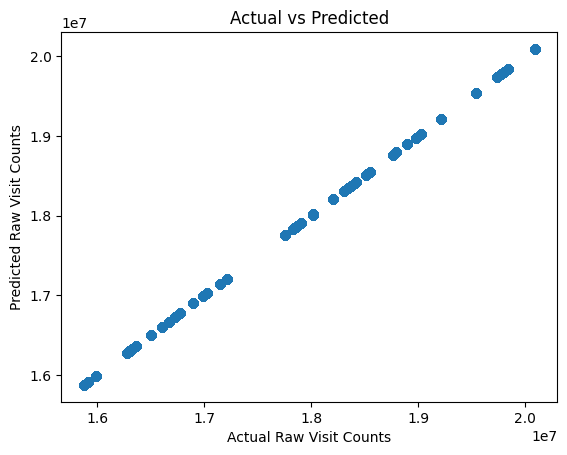

In [76]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Raw Visit Counts')
plt.ylabel('Predicted Raw Visit Counts')
plt.title('Actual vs Predicted')
plt.show()

In [77]:
!pip install gradio --quiet

In [78]:
# Import necessary libraries
import polars as pl
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import gradio as gr
import joblib

In [79]:
# Initialize LabelEncoders for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fill missing values with 'Unknown' to handle unseen categories
    df_pandas = df[col].fill_null('Unknown').to_pandas()
    le.fit(df_pandas)
    # Transform and replace in the Polars DataFrame
    df = df.with_columns([
        pl.Series(col, le.transform(df_pandas))
    ])
    label_encoders[col] = le



In [82]:
# Handle missing values for numerical columns by imputing with median
numerical_cols = df.select(pl.col(pl.Int64)).columns
for col in numerical_cols:
    median_value = df.select(pl.col(col).median()).to_numpy()[0][0]
    df = df.with_columns([
        pl.col(col).fill_null(median_value)
    ])

# 3. Modeling

# Define target and features
target = 'raw_visit_counts'
features = df.columns
features.remove(target)

In [83]:
features

['date',
 'daily_normalization_factor',
 'weekly_normalization_factor',
 'yearly_normalization_factor',
 'safegraph_place_id',
 'region',
 'postal_code',
 'location_name',
 'street_address',
 'city',
 'iso_country_code',
 'safegraph_brand_ids',
 'brands',
 'date_range_start',
 'date_range_end',
 'raw_visitor_counts',
 'visits_by_day',
 'visits_by_each_hour',
 'poi_cbg',
 'visitor_home_cbgs',
 'visitor_daytime_cbgs',
 'visitor_country_of_origin',
 'distance_from_home',
 'median_dwell',
 'bucketed_dwell_times',
 'related_same_day_brand',
 'related_same_week_brand',
 'device_type',
 'week',
 'top_category',
 'sub_category',
 'naics_code',
 'year',
 'woy',
 'month',
 'day']

In [84]:
# Convert to Pandas DataFrame for scikit-learn compatibility
X = df.select(features).to_pandas()
y = df[target].to_pandas()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
X_train.dtypes

,0
date,datetime64[ms]
daily_normalization_factor,int32
weekly_normalization_factor,int32
yearly_normalization_factor,float64
safegraph_place_id,float64
region,float64
postal_code,int32
location_name,float64
street_address,float64
city,float64


In [91]:
print(X_test.dtypes)

date                           datetime64[ms]
daily_normalization_factor              int32
weekly_normalization_factor             int32
yearly_normalization_factor           float64
safegraph_place_id                    float64
region                                float64
postal_code                             int32
location_name                         float64
street_address                        float64
city                                  float64
iso_country_code                      float64
safegraph_brand_ids                   float64
brands                                float64
date_range_start                      float64
date_range_end                        float64
raw_visitor_counts                      int32
visits_by_day                         float64
visits_by_each_hour                   float64
poi_cbg                               float64
visitor_home_cbgs                     float64
visitor_daytime_cbgs                  float64
visitor_country_of_origin         

In [92]:
X_test

,date,daily_normalization_factor,weekly_normalization_factor,yearly_normalization_factor,safegraph_place_id,region,postal_code,location_name,street_address,city,...,related_same_week_brand,device_type,week,top_category,sub_category,naics_code,year,woy,month,day
420918,2019-06-24,17388138,18366732,18506902.0,9201.0,0.0,37923,4630.0,8506.0,165.0,...,699639.0,35122.0,24.0,14.0,120.0,813110,2019.0,25.0,6,24
677228,2019-03-18,18304860,18523464,18506902.0,14857.0,0.0,37010,5967.0,11014.0,0.0,...,699639.0,35122.0,10.0,125.0,102.0,812910,2019.0,11.0,3,18
334707,2019-10-21,16322852,16322852,18506902.0,7324.0,0.0,38351,13360.0,8042.0,185.0,...,699639.0,16579.0,41.0,4.0,161.0,812112,2019.0,42.0,10,21
7809,2019-07-22,16898245,16898245,18506902.0,169.0,0.0,37863,8357.0,2850.0,295.0,...,435941.0,8020.0,28.0,16.0,235.0,722511,2019.0,29.0,7,22
322352,2019-03-18,18304860,18523464,18506902.0,7054.0,0.0,38133,14506.0,9097.0,135.0,...,192722.0,13855.0,10.0,98.0,60.0,441110,2019.0,11.0,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419931,2019-01-14,18382238,18506902,18506902.0,9179.0,0.0,37643,5933.0,4472.0,50.0,...,278759.0,10787.0,2.0,64.0,209.0,611110,2019.0,2.0,1,14
707915,2019-02-11,18932305,18547644,18506902.0,15543.0,0.0,37115,13688.0,1489.0,202.0,...,699639.0,0.0,6.0,111.0,66.0,621210,2019.0,6.0,2,11
96635,2019-07-22,16898245,16898245,18506902.0,2101.0,0.0,37013,12103.0,17175.0,13.0,...,300492.0,40232.0,28.0,72.0,237.0,442110,2019.0,29.0,7,22
394412,2019-07-29,16062027,15912972,18506902.0,8625.0,0.0,37040,6136.0,9971.0,485.0,...,269687.0,23338.0,29.0,57.0,183.0,522110,2019.0,30.0,7,29


In [94]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


In [99]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [101]:
# Convert date column to datetime objects if it's not already
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])
# Now, remove the 'date' column from your training data.
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"XGBoost RMSE: {rmse:.4f}")

# Save the trained model
xgb_model.save_model('xgb_model.json')

XGBoost RMSE: 58.9671


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.joblib')

# 5. Inference with Gradio

# Load the trained XGBoost model
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgb_model.json')

# Load label encoders
loaded_label_encoders = joblib.load('label_encoders.joblib')

In [104]:
# Define the prediction function
def predict_raw_visit_counts(
    daily_normalization_factor,
    weekly_normalization_factor,
    yearly_normalization_factor,
    region,
    city,
    device_type,
    top_category,
    sub_category
    # Add other features as necessary
):
    # Create a DataFrame from the input features
    input_data = pd.DataFrame({
        'daily_normalization_factor': [daily_normalization_factor],
        'weekly_normalization_factor': [weekly_normalization_factor],
        'yearly_normalization_factor': [yearly_normalization_factor],
        'region': [region],
        'city': [city],
        'device_type': [device_type],
        'top_category': [top_category],
        'sub_category': [sub_category]
        # Add other features with default values if necessary
    })

    # Encode categorical variables using the loaded encoders
    for col in categorical_cols:
        le = loaded_label_encoders[col]
        # Handle unseen categories by assigning 'Unknown'
        input_data[col] = input_data[col].fillna('Unknown')
        input_data[col] = input_data[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
        input_data[col] = le.transform(input_data[col])

    # Handle any missing features by adding them with default values (e.g., 0)
    model_features = loaded_model.get_booster().feature_names
    for feature in model_features:
        if feature not in input_data.columns:
            input_data[feature] = 0  # or appropriate default value

    # Reorder columns to match the training data
    input_data = input_data[model_features]

    # Predict using the loaded model
    prediction = loaded_model.predict(input_data)
    return prediction[0]

# Define input components using updated Gradio syntax
inputs = [
    gr.Number(label='Daily Normalization Factor'),
    gr.Number(label='Weekly Normalization Factor'),
    gr.Number(label='Yearly Normalization Factor'),
    gr.Textbox(label='Region'),
    gr.Textbox(label='City'),
    gr.Textbox(label='Device Type'),
    gr.Textbox(label='Top Category'),
    gr.Textbox(label='Sub Category')
    # Add other inputs as necessary
]

# Define the output component
output = gr.Textbox(label='Predicted Raw Visit Counts')

In [105]:

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_raw_visit_counts,
    inputs=inputs,
    outputs=output,
    title='Raw Visit Counts Predictor',
    description='Predict raw visit counts based on input features.'
)

# Launch the Gradio interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://34b242338b390e592d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
